In [1]:
import sys
import pickle as pkl
import torch

from tqdm import tqdm

sys.path.append("../../utils")

from surface_analyzer import *
from utils import *
from pymatgen.analysis.local_env import *

test_targets = pkl.load(open('test_targs3.pkl','rb'))
test_preds = pkl.load(open('test_preds3.pkl','rb'))
test_ids = pkl.load(open('test_ids3.pkl','rb'))


bulk_data = pkl.load(open('../data_raw/bulk_phonons.pkl','rb'))


In [2]:
len(bulk_data)*0.6

5899.8

100%|██████████| 984/984 [00:00<00:00, 7742.69it/s]


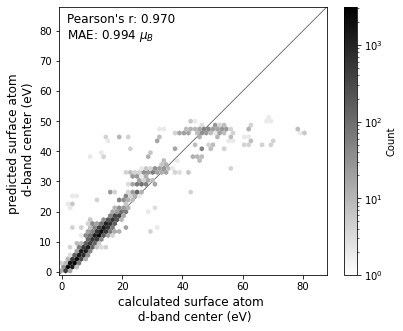

In [3]:
# only surface metal atoms

bandcenter_dict = {}

site_targs = []
site_preds = []

for index in tqdm(range(len(test_ids))):
    

    id_ = test_ids[index]

    # magmoms
    targ = np.array(test_targets[index])[:,0]#.numpy()
    pred = np.array(test_preds[index])[:,0]#.numpy()

    site_targs.append(np.array(targ))
    site_preds.append(np.array(pred))
    
    struct = bulk_data[id_]
    atomic_symbols = [spec.symbol for spec in struct.species]

    for i in range(len(atomic_symbols)):
        symbol = atomic_symbols[i]
        if symbol in bandcenter_dict.keys():
            array = bandcenter_dict[symbol]
            array.append(targ[i])
            bandcenter_dict.update({symbol:array})
        else:
            bandcenter_dict.update({symbol:[targ[i]]})
        
        

site_targs = flatten(site_targs)
site_preds = flatten(site_preds)

indexes = np.where(~np.isnan(np.array(site_targs)))[0]
_, _, ax, _ = plot_hexbin(np.array(site_targs)[indexes], np.array(site_preds)[indexes], 'magmom', bins='log', cmap='gray_r')

plt.xlabel('calculated surface atom \n d-band center (eV)')
plt.ylabel('predicted surface atom \n d-band center (eV)')

plt.savefig('parity_dband_bulk.pdf')

plt.show()



100%|██████████| 984/984 [00:05<00:00, 167.29it/s]


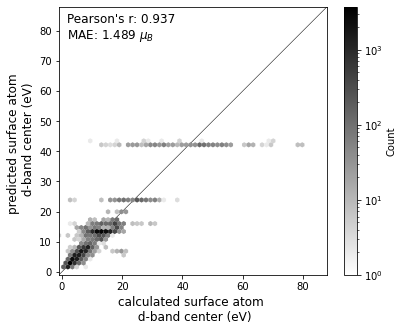

In [4]:
# only surface metal atoms

#bandcenter_dict = {}

site_targs = []
site_preds = []

for index in tqdm(range(len(test_ids))):
    

    id_ = test_ids[index]

    # magmoms
    targ = np.array(test_targets[index])[:,0]#.numpy()

    site_targs.append(np.array(targ))
    
    struct = bulk_data[id_]
    atomic_symbols = [spec.symbol for spec in struct.species]
    
    pred=[]
    for symbol in atomic_symbols:
        pred.append(np.mean(bandcenter_dict[symbol]))
            
    site_preds.append(pred)
  

site_targs = flatten(site_targs)
site_preds = flatten(site_preds)

indexes = np.where(~np.isnan(np.array(site_targs)))[0]
_, _, ax, _ = plot_hexbin(np.array(site_targs)[indexes], np.array(site_preds)[indexes], 'magmom', bins='log', cmap='gray_r')

plt.xlabel('calculated surface atom \n d-band center (eV)')
plt.ylabel('predicted surface atom \n d-band center (eV)')

plt.show()




In [5]:
import pickle as pkl
fit_values = pkl.load(open('fit_values_phonon.pkl','rb'))

In [6]:
fit_values.keys()

dict_keys(['BH', 'HB', 'NaH', 'NaO', 'SbO', 'PO', 'OP', 'LiO', 'NbO', 'SO', 'ClNa', 'FNa', 'LiP', 'PLi', 'NaP', 'BaO', 'OTi', 'TiO', 'CsCl', 'LuCl', 'NbCl', 'ClNb', 'ONb', 'CdI', 'ICd', 'TeO', 'OLa', 'LaO', 'RbO', 'BeO', 'OBe', 'TmO', 'BiO', 'BrBi', 'LiS', 'BS', 'SB', 'GaS', 'LaS', 'CaO', 'AlO', 'HO', 'OAs', 'CuO', 'AsO', 'PbO', 'OSi', 'SiO', 'ErO', 'TbO', 'CO', 'OC', 'AgO', 'BrMo', 'MoBr', 'CaSb', 'SbCa', 'CdS', 'BaS', 'TbS', 'PrO', 'TePr', 'FPd', 'RbF', 'PdF', 'SeHg', 'BrHg', 'PCa', 'ClCa', 'TiS', 'CuS', 'TaO', 'OTa', 'CaC', 'CsTe', 'LaTe', 'ZnTe', 'ScO', 'FSn', 'BrSn', 'SnF', 'OU', 'SrO', 'UO', 'SIn', 'InS', 'SmO', 'OSm', 'BeN', 'NBe', 'ScS', 'AgS', 'LiF', 'GaF', 'KO', 'OSb', 'GaO', 'BrNa', 'CsF', 'BrF', 'FBr', 'IO', 'OI', 'NdO', 'OH', 'CdO', 'YbS', 'KBr', 'SnBr', 'InSe', 'SeIn', 'OSe', 'SeO', 'InO', 'AlCl', 'ClAl', 'HoO', 'ZrBr', 'HgSe', 'BrZr', 'GeO', 'FHo', 'FZn', 'ZnF', 'BaF', 'SnO', 'ZnSe', 'CsSe', 'ErSe', 'MgO', 'NaF', 'KF', 'TlF', 'YF', 'CdSe', 'DySe', 'BrIn', 'InBr', 'BiS', 

  0%|          | 0/984 [00:00<?, ?it/s]/home/lungerja/anaconda3/envs/arpae/lib/python3.9/site-packages/pymatgen/analysis/local_env.py:4121: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn(
/home/lungerja/anaconda3/envs/arpae/lib/python3.9/site-packages/pymatgen/analysis/local_env.py:3924: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  warnings.warn(
 21%|██        | 206/984 [04:01<23:43,  1.83s/it]/home/lungerja/anaconda3/envs/arpae/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lungerja/anaconda3/envs/arpae/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 984/984 [18:34<00:00,  1.13

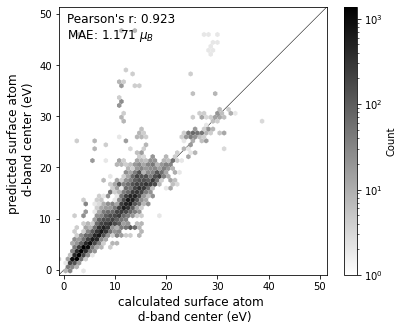

In [7]:
# need to fit Ro values for every pairing
cn = CrystalNN()

# matching the symbol set to y (np.log(-bandcenter/n)) and x (Rij)
symbol_set_bandcenter = {}   
symbol_set_rij = {}
symbol_set_n = {}

count = 0

x = []
y = []

i = 0

for dat in tqdm(test_ids):
    
    struct = bulk_data[dat]

    
    for index in range(len(struct.sites)):
        
        site1 = struct.sites[index]
        symbol1 = list(site1.species.as_dict().keys())[0]
        
        bandcenter = struct.site_properties['phonon_bandcenter'][index]
        
        # get symbol set for the given site
        symbol_set_site = []
        neighbors = cn.get_nn_info(struct, index)
        
        dist = []
        for n in neighbors:
            site2 = n['site']
            symbol2 = list(site2.species.as_dict().keys())[0]
            symbol_set_site.append(symbol1+symbol2)
            dist.append(site2.distance(site1))
            
        n = len(dist)
        d = np.mean(dist)
        
        # check that there's only one type of interaction for this site
        pred=0
        for i in range(len(dist)):
            
            symbol = symbol_set_site[i]
            
            if symbol in fit_values.keys():
                
                Ro = fit_values[symbol]['Ro']
                b = fit_values[symbol]['b']
                
                if exp((Ro-dist[i])/b) < 20:
                    pred+=exp((Ro-dist[i])/b)
                else:
                    pred+=np.nan
                    
            else:
                pred+=np.nan
                 
        x.append(pred)
        y.append(bandcenter)
            

site_targs = y
site_preds = x



indexes_finite = np.where(np.isfinite(np.array(site_preds)))[0]
indexes_no_nan = np.where(~np.isnan(np.array(site_preds)))[0]
indexes = np.intersect1d(indexes_finite, indexes_no_nan)

site_targs = np.array(site_targs)[indexes]
site_preds = np.array(site_preds)[indexes]

        
_, _, ax, _ = plot_hexbin(site_targs, site_preds, 'magmom', bins='log', cmap='gray_r')


plt.xlabel('calculated surface atom \n d-band center (eV)')
plt.ylabel('predicted surface atom \n d-band center (eV)')

plt.show()





In [ ]:
plt.scatter(site_targs, site_preds)